# 1. Please make sure you have / activate the virtual environment:

1. `conda env create -f environments.yml`

2. `conda activate BCModel`

# 2. If you encounter any problems, please let me know! 

# Introduction to Agent-Based Modeling

- **Instructor: Minsu Jang**, Postdoc @Behave Lab
- University of Milan, Computational Social Science Workshop

# Agenda of the day...

1. What's ABM?
2. How AMBs work
3. Introduction to `mesa` library
4. Hands-on practice of programming a Bounded-Confidence (BC) Model of Opinion Formation.

## What Is an Agent-Based Model (ABM)?
- A simulation of **individual agents** with rules governing their behavior.
- Focuses on **interaction** between **heterogeneous agents** embedded in given **social structures**.
- System-level (macro-level) patterns **emerge** from these interactions.

> "ABMs are generative tools: they show how macro-patterns can emerge from micro-rules." – *Manzo (2022)*

# How Are ABMs Different from Game-Theoretic Analytical Models?

<br> 

Briefly speaking, ...

- **Analytical (Game-Theoretic) Models:**
    - Start with **utility functions** with rational choice assumptions  
    - Use **backward induction**
    - Aim to **predict optimal strategies** under specific constraints


- **Agent-Based Models (ABMs):**
    - Start with **behavioral rules** and **interaction mechanisms**
    - Let agents **interact over time** through computer simulation
    - Aim to **observe emergent patterns** (e.g., norms, polarization, diffusion, cooperation)

👉 ABMs are generative; game theory is deductive.

# Key Components of ABMs
1. **Agents** 
2. **Environment**  
3. **Rules of Interaction** 
4. **Time** — step-wise simulation to observe dynamics

ABMs are built with this structure in mind.

## How ABMs Work 

1. Initialize agents with properties.
2. At each step:
   - Agents observe neighbors/environment.
   - Apply behavior rules.
   - States get updated.
3. Record macro-level outcomes.

👉 Keep track of emergence over iterations

<img src="abm_structure1.png" alt="ABM as Mechanism Explorer" width="3300">

![Fitting data into ABM](abm_structure2.png)

# Examples of Programming Tools for ABMs

1. `NetLogo`
2. **`mesa` (`python` based)**
3. `MASON` (`Java` based)
4. `Agents.jl` (`Julia` based)
5. `SWARM`
6. `ABM` package in `R`

## What is `MESA`?

- Python library for building ABMs
- Inspired by NetLogo but more flexible and expandable
- Supports:
  - Agent & environment classes
  - Visualizations 
  - Batch runs & data export

We'll use `mesa` in today’s session.

# Why `MESA`?

- **Python-native**: integrates smoothly with useful `python` tools like `NumPy, pandas, matplotlib, and scikit-learn`  
- **Modular and extensible**: easily build and modify custom agents, models, and environments  
- **Built-in visualization**: web-based interfaces 
- **Open-source and research-ready**: transparent, documented, and actively maintained  
- **Comprehensive and accessible**: clean structure, easy setup, and supports interactive exploration

![developrersurvey](developersurvey.png)

# How does `MESA` work?

> `Mesa` is "modular," meaning that its **1) modeling, 2) analysis, and 3) visualization** components are kept **separate but intended to work together.**

### Bulding Blocks 
1. Modeling Modules: 
    1. Classes used to build the models themselves: 
        - `model` and `agent` classes. 
        - `space` where agents reside and interact.
        - built-in functions to manage agents/environments.


2. Analysis Modules: 
    1. Tools to collect data generated from the simulation: e.g., `datacollector`
    2. Tools to run models multiple times: e.g., `batchrunner`

<br>

3. Visualization Modules: 
    1. Classes to create and launch an interactive model visualization (using a browser-based interface).

# Modeling Module Example: 

1. `agent` class defines 1) attributes of agents, and 2) how each agents behaves.



In [3]:
# example code
from mesa import Agent, Model, space

class MyAgent(Agent):
    def __init__(self, model, age):
        super().__init__(model)
        self.age = age

    def step(self): # defines how an agent behaves at each "time" of interaction
        self.age += 1
        print(f"Agent {self.unique_id} now is {self.age} years old")
        # Whatever else the agent does when activated...

/opt/anaconda3/envs/BCModel/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# Modeling Modules Example: 

2. `model` class defines 1) system-wise attributes, and 2) how the system works.

3. `space` class defines how agents are placed in the system.

In [4]:
# example code
class MyModel(Model):
    def __init__(self, n_agents):
        super().__init__()
        self.grid = space.MultiGrid(10, 10, torus=True)
        for _ in range(n_agents):
            initial_age = self.random.randint(0, 80)
            a = MyAgent(self, initial_age)
            coords = (self.random.randrange(0, 10), self.random.randrange(0, 10))
            self.grid.place_agent(a, coords)

    def step(self):
        self.agents.shuffle_do("step")

In [5]:
mymodel = MyModel(10)

In [6]:
agent_ages=[agent.age for agent in mymodel.agents]; agent_ages

[79, 61, 58, 51, 10, 32, 29, 28, 64, 11]

In [8]:
mymodel.step()

Agent 6 now is 33 years old
Agent 3 now is 59 years old
Agent 5 now is 11 years old
Agent 2 now is 62 years old
Agent 1 now is 80 years old
Agent 10 now is 12 years old
Agent 7 now is 30 years old
Agent 8 now is 29 years old
Agent 9 now is 65 years old
Agent 4 now is 52 years old


In [7]:
mymodel.agents[0].model.grid

# Application: Bounded Confidence Model of Opinion Formation

# Modeling Opinion Formation with ABMs


### Why model opinion formation?

👉 Agent-based models help us study how opinions **evolve over time** through **local interactions**.





### Key Motivations:
- Understand **polarization**, **consensus**, and **radicalization**
- Simulate the role of **social influence**, **network structure**, and **media exposure**
- Explore how **micro-level rules** lead to **macro-level opinion patterns**



## Common ABM Approaches to Opinion Formation:


### **1. DeGroot Model (Linear Averaging)**  

Agents update their opinions by averaging the (weighted) opinions of their neighbors:

$$
x_i(t+1) = \sum_{j \in \mathcal{N}_i} w_{ij} \cdot x_j(t)
$$

- $( x_i(t) )$: opinion of agent $( i )$ at time $( t )$  

- $( w_{ij} )$: weight assigned to agent $( j )$'s opinion  

- $( \mathcal{N}_i )$: set of neighbors of agent $( i )$

### **2. Bounded Confidence Model (e.g., Deffuant or Hegselmann-Krause)**  

Agents interact only if their opinions are within a confidence threshold $( \varepsilon )$.

Let $( \mathcal{N}_i(t) )$ be the set of agents whose opinions are close enough to agent $( i )$:

$$
\mathcal{N}_i(t) = \left\{ j \mid |x_j(t) - x_i(t)| < \varepsilon \right\}
$$

Then the opinion of agent $( i )$ is updated as:

$$
x_i(t+1) = \frac{1}{|\mathcal{N}_i(t)|} \sum_{j \in \mathcal{N}_i(t)} x_j(t)
$$



# Bounded Confidence (BC) Model Details

<br> 

The **Bounded Confidence Model** is a model of opinion dynamics where:

- Each agent holds a continuous opinion (e.g., a number between 0 and 1)
- Agents **only interact with others whose opinions are within a confidence bound** (ε)
- When agents interact, they adjust their opinions **toward each other**

<br>

**Key Features:**
- Models **homophily** and **confirmation bias**
- Leads to **consensus**, **polarization**, or **fragmentation**
- Widely used to study **opinion dynamics**, **polarization**, and **social learning**

> *"Agents are influenced only by those whose views are already somewhat aligned with their own."*

# BC modeling practice in `mesa`

### What the model does
- Simulates how individuals (agents) form and adjust opinions over time.
- Models **opinion dynamics** using the Bounded Confidence framework (Hegselmann–Krause-style).
- Explores how interaction thresholds (ε) and randomness (μ) affect **polarization**, **consensus**, or **fragmentation**.

<br>

### How the model works
- Each agent has:
  - An **opinion**: a number between 0 and 1
  - A **confidence bound** (ε): only influenced by others within ε-distance
- Each step:
  1. Agents average opinions of others within ε of their own
  2. With probability μ, agents may randomly reset opinion to a new value ∈ [0, 1]
- All agents are influenced in parallel at each time tick.




### How we implement it in Mesa
- **`Person` class**:
  - Represents an individual agent
  - Implements `update_opinion()` and `random_opinion_change()` behaviors
- **`BCModel` class**:
  - Creates agents, stores global parameters (μ, ε)
  - Advances the model through a `step()` function
- Uses `mesa.Model` and `mesa.Agent` as the base classes.

Let's program the model in `mesa`!

In [9]:
# import required libraries
import numpy as np
from mesa import Agent
from typing import List, Dict, Any

First, define `Agent` class of our model!

In [11]:
class Person(Agent):
    """
    A Person agent with an opinion that can be influenced by other agents.
    
    This agent implements the Bounded Confidence (BC) model of opinion dynamics,
    where agents only consider opinions of others if they are within their
    bound of confidence (epsilon).
    
    Attributes:
        opinion (float): The agent's current opinion (between 0 and 1)
        epsilon (float): Bound of confidence i.e., how far an opinion can be from own to still exert influence
    """
    def __init__(self, model: Any, opinion: float, epsilon: float):
        super().__init__(model)
        if not 0 <= opinion <= 1:
            raise ValueError("Opinion must be a float between 0 and 1.")
        self.opinion = opinion 
        if not 0 <= epsilon <= 1:
            raise ValueError("Bound of confidence must be a float between 0 and 1.")
        self.epsilon = epsilon

In [ ]:
    def update_opinion(self) -> None:
        """
        Update the agent's opinion based on the opinions of others within their bound of confidence.
        
        The agent finds all other agents whose opinions are within their bound of confidence
        and updates their own opinion to the mean of those opinions.
        
        If no influencing agents are found, the opinion remains unchanged.
        """
        influencing_agents_opinions: List[float] = [
            agent.opinion for agent in self.model._all_agents
            if (abs(agent.opinion - self.opinion) < self.epsilon) and (agent.unique_id != self.unique_id)
            ]
        # Only update if there are influencing agents
        if influencing_agents_opinions:
            self.opinion = np.mean(influencing_agents_opinions)
    
    def random_opinion_change(self) -> None:
        """
        Randomly change opinion with probability mu (set in the BCModel class, same for each agent).
        
        The agent has a probability mu of changing its opinion to a random value
        between 0 and 1, simulating external influences or individual exploration.
        """
        if np.random.uniform(0, 1) < self.model.mu:
            self.opinion = self.model.np_random.uniform(0, 1)
    
    def tick(self) -> None:
        """
        Execute one step for the agent.
        
        First updates opinion based on others' influence, then potentially
        applies a random opinion change.
        """
        self.update_opinion()
        self.random_opinion_change()

In [2]:
class Person(Agent):
    """
    A Person agent with an opinion that can be influenced by other agents.
    
    This agent implements the Bounded Confidence (BC) model of opinion dynamics,
    where agents only consider opinions of others if they are within their
    bound of confidence (epsilon).
    
    Attributes:
        opinion (float): The agent's current opinion (between 0 and 1)
        epsilon (float): Bound of confidence i.e., how far an opinion can be from own to still exert influence
    """
    def __init__(self, model: Any, opinion: float, epsilon: float):
        super().__init__(model)
        if not 0 <= opinion <= 1:
            raise ValueError("Opinion must be a float between 0 and 1.")
        self.opinion = opinion 
        if not 0 <= epsilon <= 1:
            raise ValueError("Bound of confidence must be a float between 0 and 1.")
        self.epsilon = epsilon
        
    def update_opinion(self) -> None:
        """
        Update the agent's opinion based on the opinions of others within their bound of confidence.
        
        The agent finds all other agents whose opinions are within their bound of confidence
        and updates their own opinion to the mean of those opinions.
        
        If no influencing agents are found, the opinion remains unchanged.
        """
        influencing_agents_opinions: List[float] = [
            agent.opinion for agent in self.model._all_agents
            if (abs(agent.opinion - self.opinion) < self.epsilon) and (agent.unique_id != self.unique_id)
            ]
        # Only update if there are influencing agents
        if influencing_agents_opinions:
            self.opinion = np.mean(influencing_agents_opinions)
    
    def random_opinion_change(self) -> None:
        """
        Randomly change opinion with probability mu (set in the BCModel class, same for each agent).
        
        The agent has a probability mu of changing its opinion to a random value
        between 0 and 1, simulating external influences or individual exploration.
        """
        if np.random.uniform(0, 1) < self.model.mu:
            self.opinion = self.model.np_random.uniform(0, 1)
    
    def tick(self) -> None:
        """
        Execute one step for the agent.
        
        First updates opinion based on others' influence, then potentially
        applies a random opinion change.
        """
        self.update_opinion()
        self.random_opinion_change()

Define some useful functions we will be using under `Model` class

In [12]:
def get_mean_opinions(model):
    return np.mean([agent.opinion for agent in model._all_agents])

def get_median_opinions(model):
    return np.median([agent.opinion for agent in model._all_agents])

def get_opinion_distribution(model):
    return [agent.opinion for agent in model._all_agents]

def get_mu(model):
    return model.mu

def get_agent_epsilon(agent):
    return agent.epsilon

Define how system (i.e., macro-level model) works.

In [13]:
from mesa import Model, DataCollector

In [14]:
class BCModel(Model):
    def __init__(self, params: Dict[str, Union[int, float]]):
        # Mandatory on Mesa v3
        super().__init__(seed=params.get("seed")) # Setting Mesa's seed

        # Parameter values
        self.num_agents: int = params.get("num_agents")
        self.epsilon_max: float = params.get("epsilon_max")
        self.epsilon_min: float = params.get("epsilon_min")
        self.alpha: int = params.get("alpha")
        self.beta: int = params.get("beta")
        self.mu: float = params.get("mu")
        self.num_runs: int = params.get("num_runs")

        # Setting numpy's seed
        self.np_random = np.random.default_rng(params.get("seed"))

        # Create agents
        for i in range(self.num_agents):
            Person(
                model = self,
                opinion = self.np_random.uniform(0, 1),  # New random opinion for each agent
                epsilon = self.calculate_epsilon()  # New epsilon for each agent
                )
            
        # Pickable DataCollector instance
        self.datacollector = DataCollector(
            model_reporters={
                "MeanOpinions": get_mean_opinions,
                "MedianOpinions": get_median_opinions,
                "OpinionDistr": get_opinion_distribution,
                "mu": get_mu
            },
            agent_reporters={
                "epsilon": get_agent_epsilon
            }
        )

NameError: name 'Union' is not defined

In [ ]:
    def calculate_epsilon(self) -> float:
        """
        Sample from a scaled Beta(alpha, beta) distribution (Lorenz, 2010).
        """
        x: float = self.np_random.gamma(shape=self.alpha, scale=1.0)
        y: float = self.np_random.gamma(shape=self.beta, scale=1.0)
        beta_sample = x / (x + y)
        return self.epsilon_min + beta_sample * (self.epsilon_max - self.epsilon_min)

    def step(self) -> None:
        
        for _ in range(self.num_runs):
            # Make agents act (assuming a custom method)
            self.agents.shuffle_do("tick")
        
            # Collect results
            self.datacollector.collect(self) 

In [15]:
"""
Bounded Confidence model for opinion dynamics simulation.
This module contains the BCModel class that implements the model.
"""

from mesa import Model, DataCollector
from agent import Person
import numpy as np
from typing import Dict, Union
# Import from utilities
from utilities import (
    get_mean_opinions,
    get_median_opinions,
    get_opinion_distribution,
    get_mu,
    get_agent_epsilon
)

class BCModel(Model):
    """
    Model class for the Bounded Confidence (BC) model of opinion dynamics.
    
    The model initializes a population of Person agents with random opinions
    and epsilon values as in Lorenz (2010). 

    Agents update their opinions based on other agents' opinions that are within their bounds of confidence.
    """

    def __init__(self, params: Dict[str, Union[int, float]]):
        # Mandatory on Mesa v3
        super().__init__(seed=params.get("seed")) # Setting Mesa's seed

        # Parameter values
        self.num_agents: int = params.get("num_agents")
        self.epsilon_max: float = params.get("epsilon_max")
        self.epsilon_min: float = params.get("epsilon_min")
        self.alpha: int = params.get("alpha")
        self.beta: int = params.get("beta")
        self.mu: float = params.get("mu")
        self.num_runs: int = params.get("num_runs")

        # Setting numpy's seed
        self.np_random = np.random.default_rng(params.get("seed"))

        # Create agents
        for i in range(self.num_agents):
            Person(
                model = self,
                opinion = self.np_random.uniform(0, 1),  # New random opinion each agent
                epsilon = self.calculate_epsilon()  # New epsilon each agent
                )
        
        # Pickable DataCollector instance
        self.datacollector = DataCollector(
            model_reporters={
                "MeanOpinions": get_mean_opinions,
                "MedianOpinions": get_median_opinions,
                "OpinionDistr": get_opinion_distribution,
                "mu": get_mu
            },
            agent_reporters={
                "epsilon": get_agent_epsilon
            }
        )

    def calculate_epsilon(self) -> float:
        """
        Sample from a scaled Beta(alpha, beta) distribution (Lorenz, 2010).
        """
        x: float = self.np_random.gamma(shape=self.alpha, scale=1.0)
        y: float = self.np_random.gamma(shape=self.beta, scale=1.0)
        beta_sample = x / (x + y)
        return self.epsilon_min + beta_sample * (self.epsilon_max - self.epsilon_min)

    def step(self) -> None:
        
        for _ in range(self.num_runs):
            # Make agents act (assuming a custom method)
            self.agents.shuffle_do("tick")
        
            # Collect results
            self.datacollector.collect(self) 

Let's try to run the model.

First, let's define the input parameters and build a model.

In [10]:
params = {
    "seed": 100, 
    "num_agents": 200, 
    "epsilon_max": 0.30, 
    "epsilon_min": 0,
    "alpha": 2,
    "beta": 4,
    "mu": 0, 
    "num_runs": 300
}

In [16]:
# buidling the model:
model = BCModel(params) 

In [17]:
# check each agent's epsilon value
agent_epsilon=[agent.epsilon for agent in model.agents]; np.mean(agent_epsilon)

np.float64(0.09931380062176964)

Let's run the model now.

In [18]:
model.step()

In [19]:
results = model.datacollector.get_model_vars_dataframe(); results

,MeanOpinions,MedianOpinions,OpinionDistr,mu
0,0.512622,0.497505,"[0.8347698077033574, 0.5651603831007759, 0.977...",0
1,0.513717,0.502903,"[0.8410468652967957, 0.535674654395618, 0.9725...",0
2,0.514898,0.491259,"[0.8413000172365628, 0.50741937478537, 0.96345...",0
3,0.517470,0.481393,"[0.8472617234957903, 0.4959736735954013, 0.957...",0
4,0.519706,0.468138,"[0.8548474187940757, 0.47597539283581886, 0.95...",0
...,...,...,...,...
295,0.658756,0.551814,"[0.9348302592729213, 0.5518139697743635, 0.934...",0
296,0.658756,0.551814,"[0.9348302592729213, 0.5518139697743635, 0.934...",0
297,0.658756,0.551814,"[0.9348302592729213, 0.5518139697743635, 0.934...",0
298,0.658756,0.551814,"[0.9348302592729213, 0.5518139697743635, 0.934...",0


Check the distribution over time.

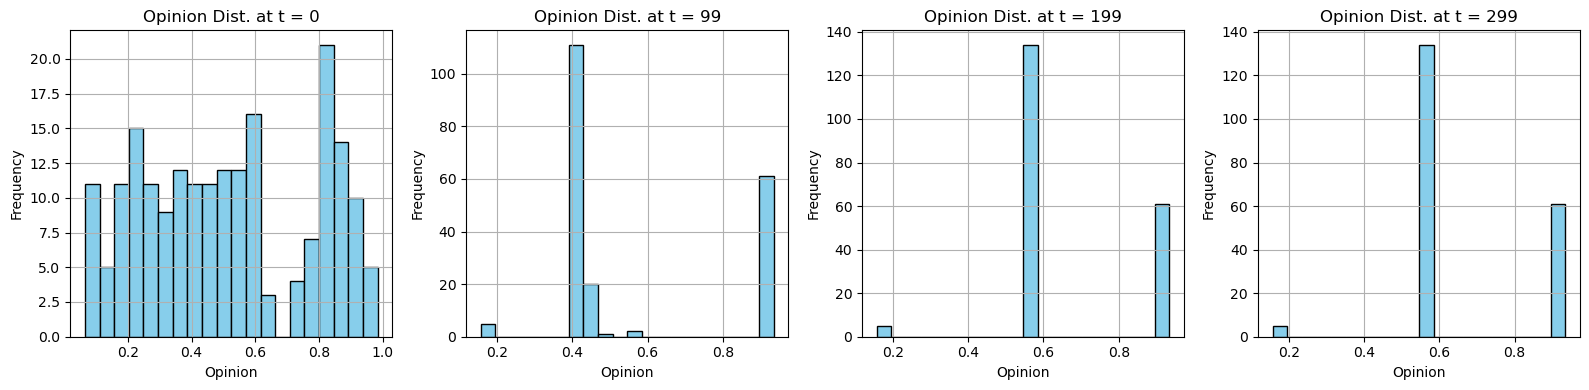

In [20]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 4, figsize=(16, 4))  # 1 row, 4 columns

steps = [0, 99, 199, 299]

for i, step in enumerate(steps):
    ax = axs[i]
    
    tit = f'Opinion Dist. at t = {step}'
    opinion_dst_t = results.OpinionDistr[step]

    ax.hist(opinion_dst_t, bins=20, color='skyblue', edgecolor='black')
    ax.set_title(tit)
    ax.set_xlabel("Opinion")
    ax.set_ylabel("Frequency")
    ax.grid(True)

plt.tight_layout()
plt.show()

Let's play with the input parameters.

In [22]:
# citizens being more generous
new_params = {
    "seed": 100, 
    "num_agents": 200, 
    "epsilon_max": 0.50, # this was 0.3 before
    "epsilon_min": 0.05, # this was 0 before
    "alpha": 2,
    "beta": 4,
    "mu": 0, 
    "num_runs": 300
}

In [25]:
new_model = BCModel(new_params) 
new_model.step()
new_results = new_model.datacollector.get_model_vars_dataframe(); new_results

,MeanOpinions,MedianOpinions,OpinionDistr,mu
0,0.513159,0.488574,"[0.8425763075250162, 0.5853716932112947, 0.935...",0
1,0.513678,0.450944,"[0.7718984808305382, 0.5664388926220773, 0.867...",0
2,0.514766,0.449543,"[0.7255829908232395, 0.5262696987228384, 0.810...",0
3,0.518220,0.483977,"[0.6818755221439414, 0.48787231077265675, 0.74...",0
4,0.527793,0.515293,"[0.5796914066030391, 0.5179099369805035, 0.694...",0
...,...,...,...,...
295,0.573846,0.571928,"[0.5718941164742173, 0.5719192177076862, 0.571...",0
296,0.573959,0.572042,"[0.5720754085677963, 0.5719988229330998, 0.572...",0
297,0.574073,0.572155,"[0.5721477480915687, 0.5721539533923413, 0.572...",0
298,0.574185,0.572268,"[0.5722353047798882, 0.5722309177840896, 0.572...",0


In [29]:
# check each agent's epsilon value
new_agent_epsilon=[agent.epsilon for agent in new_model.agents]; np.mean(new_agent_epsilon)

np.float64(0.19897070093265448)

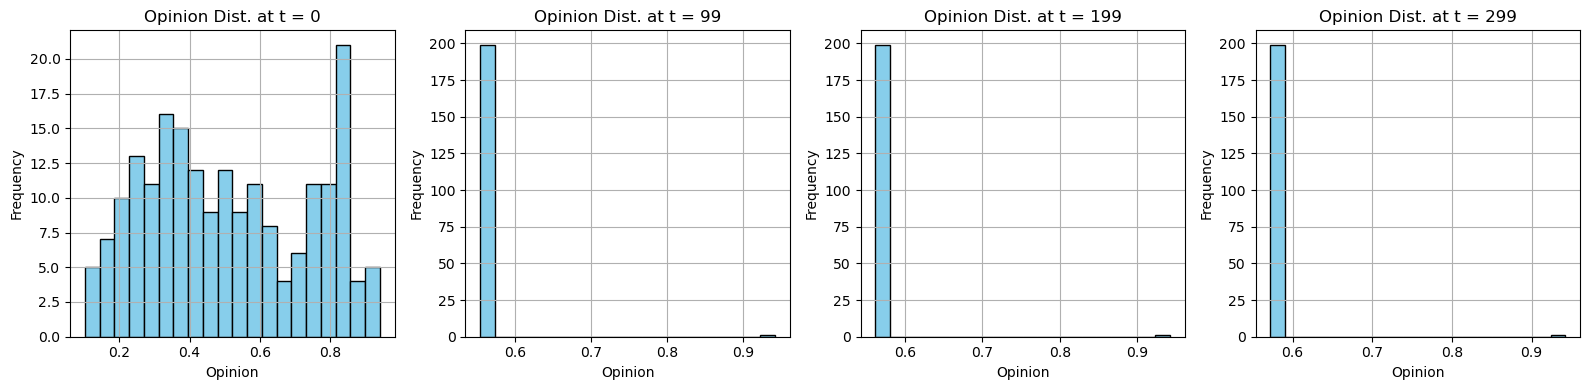

In [26]:
fig, axs = plt.subplots(1, 4, figsize=(16, 4))  # 1 row, 4 columns

steps = [0, 99, 199, 299]

for i, step in enumerate(steps):
    ax = axs[i]
    
    tit = f'Opinion Dist. at t = {step}'
    opinion_dst_t = new_results.OpinionDistr[step]

    ax.hist(opinion_dst_t, bins=20, color='skyblue', edgecolor='black')
    ax.set_title(tit)
    ax.set_xlabel("Opinion")
    ax.set_ylabel("Frequency")
    ax.grid(True)

plt.tight_layout()
plt.show()

Let's make model with stronger cognitive bias

In [21]:
new_params = {
    "seed": 100, 
    "num_agents": 200, 
    "epsilon_max": 0.05, 
    "epsilon_min": 0.0,
    "alpha": 2,
    "beta": 4,
    "mu": 0, 
    "num_runs": 300
}

In [22]:
new_model = BCModel(new_params) 
new_model.step()
new_results = new_model.datacollector.get_model_vars_dataframe(); new_results

,MeanOpinions,MedianOpinions,OpinionDistr,mu
0,0.511876,0.502207,"[0.8260322092793961, 0.6038953149968298, 0.982...",0
1,0.511871,0.503719,"[0.8171333183336853, 0.6036596947896169, 0.983...",0
2,0.511760,0.504384,"[0.8062461859830222, 0.6042833204132896, 0.988...",0
3,0.511622,0.504092,"[0.8036324918288393, 0.6043160581814642, 0.988...",0
4,0.511463,0.503893,"[0.8038418185960441, 0.6067703978236868, 0.988...",0
...,...,...,...,...
295,0.511690,0.501907,"[0.8044376623351447, 0.5804525870349158, 0.991...",0
296,0.511690,0.501907,"[0.8044376623351447, 0.5804525870349158, 0.991...",0
297,0.511690,0.501907,"[0.8044376623351447, 0.5804525870349158, 0.991...",0
298,0.511690,0.501907,"[0.8044376623351447, 0.5804525870349158, 0.991...",0


In [23]:
# check each agent's epsilon value
new_agent_epsilon=[agent.epsilon for agent in new_model.agents]; np.mean(new_agent_epsilon)

np.float64(0.016552300103628275)

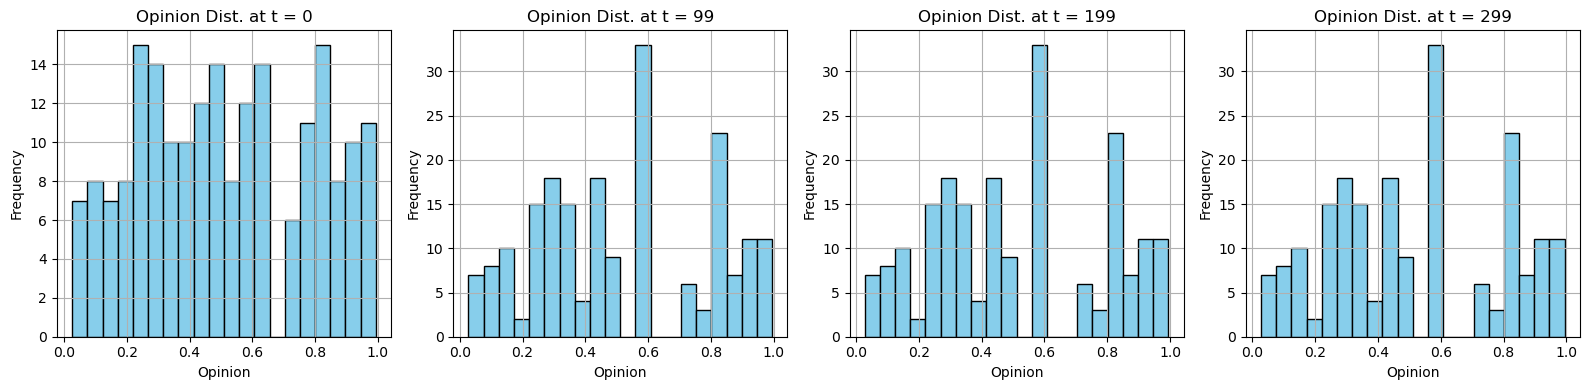

In [24]:
fig, axs = plt.subplots(1, 4, figsize=(16, 4))  # 1 row, 4 columns

steps = [0, 99, 199, 299]

for i, step in enumerate(steps):
    ax = axs[i]
    
    tit = f'Opinion Dist. at t = {step}'
    opinion_dst_t = new_results.OpinionDistr[step]

    ax.hist(opinion_dst_t, bins=20, color='skyblue', edgecolor='black')
    ax.set_title(tit)
    ax.set_xlabel("Opinion")
    ax.set_ylabel("Frequency")
    ax.grid(True)

plt.tight_layout()
plt.show()

# Where to Go From Here

- Explore other models: segregation, diffusion, collective action  
  → `mesa` includes many examples you can try! See: [Mesa Examples](https://mesa.readthedocs.io/latest/examples.html)

- Use `BatchRunner` to iterate simulations across parameter values  
  → This helps you explore the model outcomes **systematically**.

- Connect ABMs to empirical data  
  → You’ll be working on this with Francesco in next week's session!

👉 ABMs aren’t just simulations — they’re experimental laboratories for social science theory.


## 💬 Any Questions?
_Feel free to reach out anytime:_ 📧 [minsu.jang@unimib.it](mailto:minsu.jang@unimib.it)